
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>


We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [13]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

In [14]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low




In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.


## Question 1


**Question**: Is there a relationship between the booking lead time and the likelihood of cancellation?

**Answer**: There is a significant difference in lead times between canceled and non-canceled bookings. On average, canceled bookings have a lead time of about 142.5 days, while non-canceled bookings have a much shorter lead time of around 55.9 days. 

This suggests that customers who book further in advance are more likely to cancel their reservations. This could be because customers who book far in advance might be making tentative plans, allowing more time for unforeseen changes that lead to cancellations. 





## Supporting Analysis

In [5]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

booking_status,average_lead_time
<fct>,<dbl>
canceled,142.48849
not_canceled,55.86101


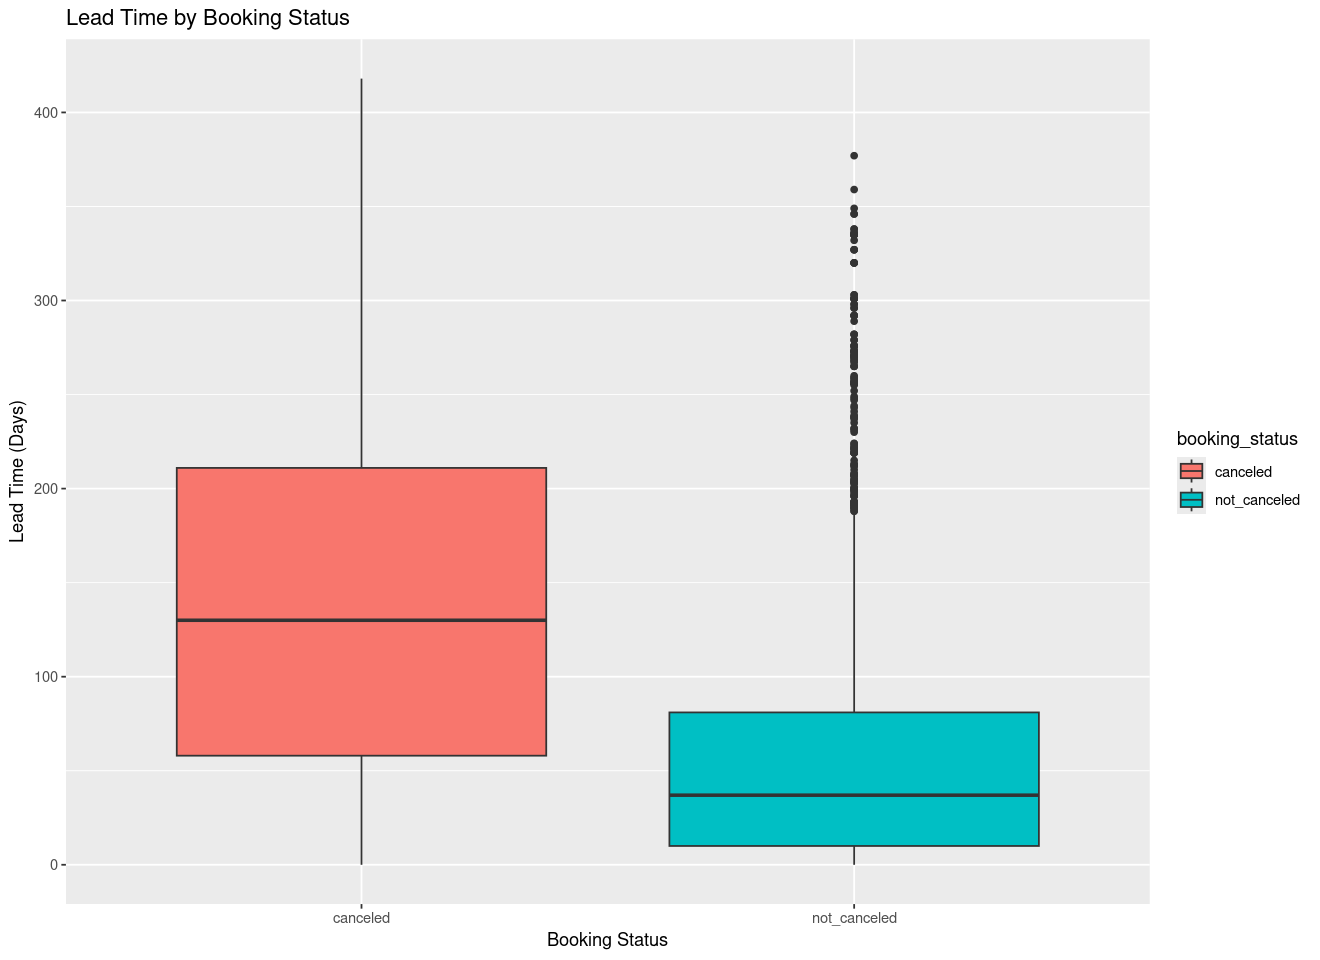

In [6]:
lead_time_df <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(average_lead_time = mean(lead_time_days))

# View the data
lead_time_df

ggplot(bookings_df, aes(x = booking_status, y = lead_time_days, fill = booking_status)) +
  geom_boxplot() +
  labs(title = "Lead Time by Booking Status",
       x = "Booking Status",
       y = "Lead Time (Days)") 



## Question 2


**Question**: How does the room price relate to the booking status?

**Answer**: The room price shows that canceled bookings have a slightly higher average room price compared to non-canceled bookings `$111.91 vs. $105.91`. This indicates that more expensive rooms are marginally more prone to cancellation, which may be due to customers feeling more cautious about their commitments to higher-cost bookings. 

Customers who book premium rooms are more likely to cancel, possibly due to a more flexible financial situation or a greater inclination toward planning adjustments.







## Supporting Analysis


In [7]:
room_price_df <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(average_room_price = mean(room_price))

# View room_price_df
room_price_df


booking_status,average_room_price
<fct>,<dbl>
canceled,111.9145
not_canceled,105.9077


## Question 3


**Question**: Does the number of special requests impact the likelihood of a cancellation?

**Answer**:Non-canceled bookings generally have a higher average number of special requests compared to canceled bookings. Customers who make special requests are more engaged in their bookings and therefore less likely to cancel. 

Customers with specific needs or preferences, indicated by their special requests, may be more committed to their reservations and more inclined to follow through with their bookings. This trend reflects a potential relationship between customer involvement in the booking process and their likelihood of honoring the reservation







## Supporting Analysis


booking_status,average_special_requests
<fct>,<dbl>
canceled,0.3360614
not_canceled,0.7676393


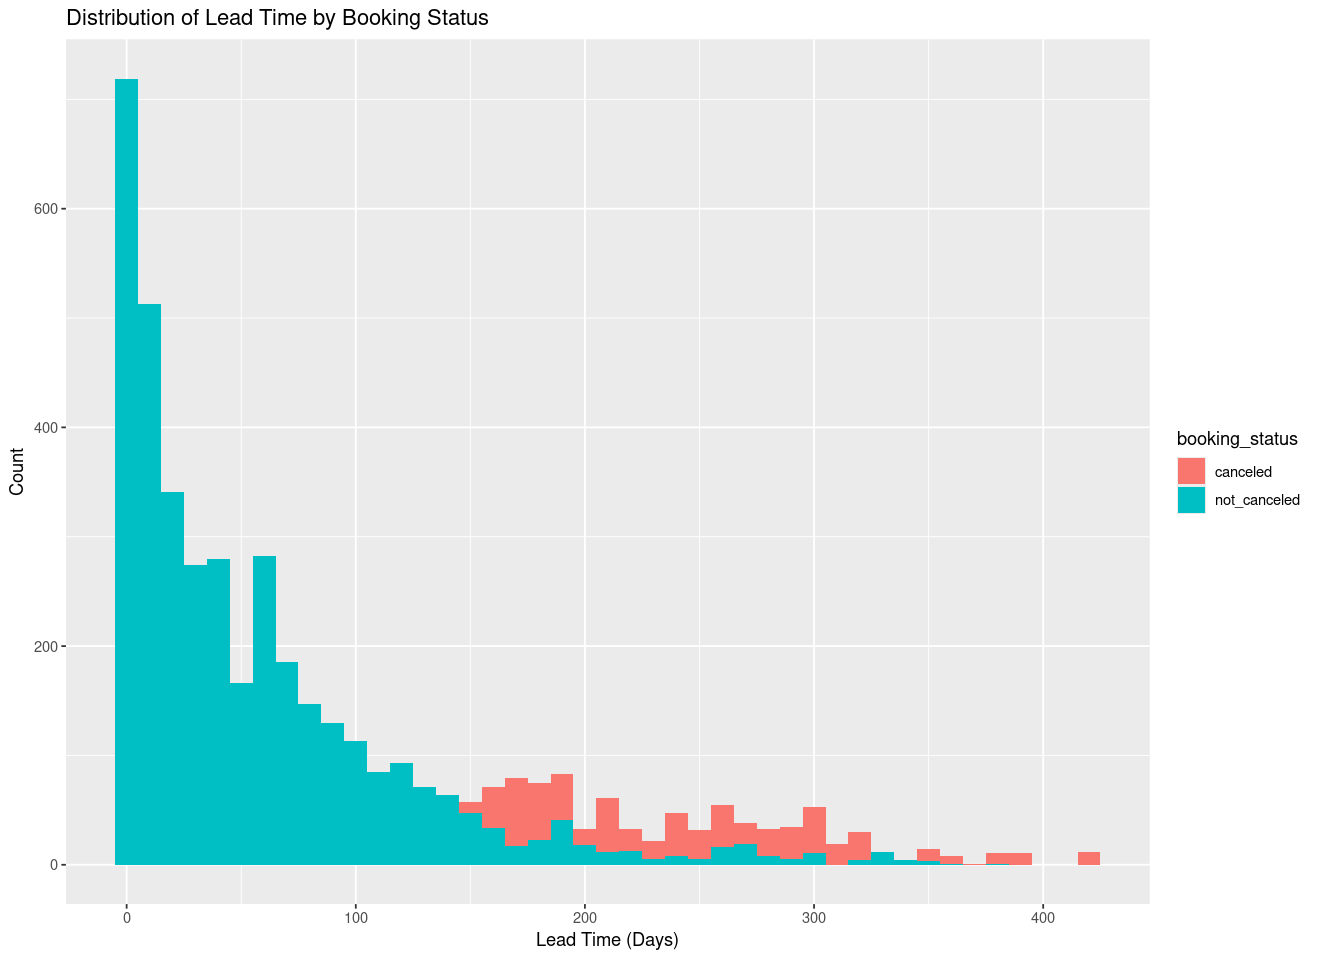

In [8]:
special_requests_df <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(average_special_requests = mean(special_requests))

# View data
special_requests_df


ggplot(bookings_df, aes(x = lead_time_days, fill = booking_status)) +
  geom_histogram(binwidth = 10, position = "identity") +
  labs(title = "Distribution of Lead Time by Booking Status",
       x = "Lead Time (Days)",
       y = "Count") 


## Question 4


**Question**:What is the impact of the booking type on cancellations?


**Answer**: There are distinct cancellation patterns across different booking types. For example, if the data shows that online bookings have a higher cancellation rate compared to mobile app bookings, this could suggest that customers using online channels may be more inclined to make tentative plans and later cancel.

This pattern might be driven by the ease of booking online or the type of customer attracted to online bookings. Conversely, bookings made through other channels (like phone or in person) may have lower cancellation rates, indicating a stronger commitment to the reservation.


## Supporting Analysis


`summarise()` has grouped output by 'booking_type'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


booking_type,booking_status,count,percentage
<fct>,<fct>,<int>,<dbl>
online,canceled,1326,36.50881
mobile_app,canceled,518,33.48416
corporate_partner,canceled,34,11.64384
travel_agency,canceled,77,30.31496


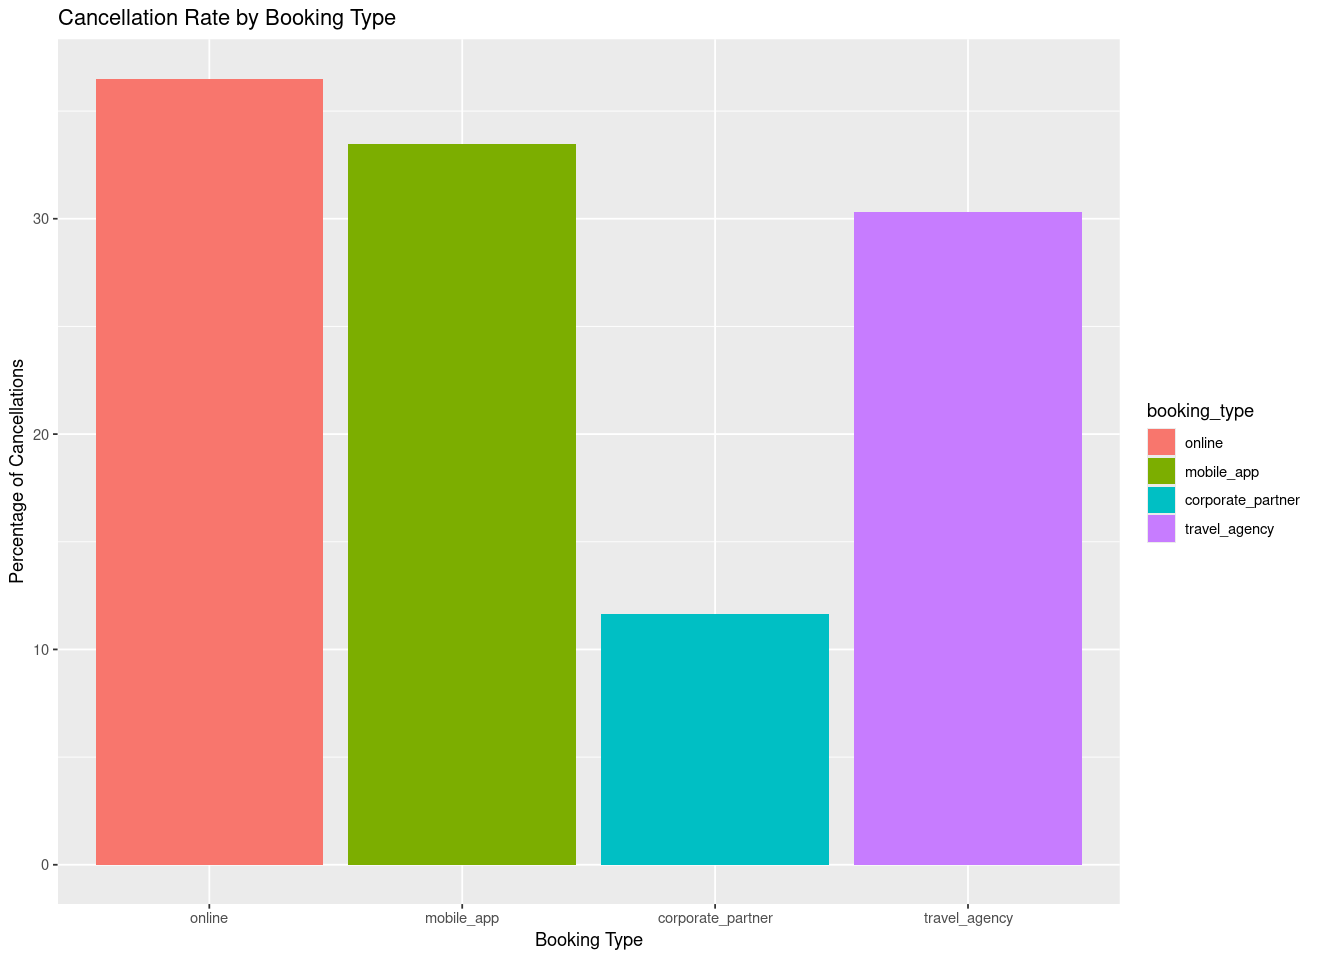

In [9]:
booking_type_df <- bookings_df %>%
  group_by(booking_type, booking_status) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  filter(booking_status == "canceled")

# View booking_type_df
booking_type_df


ggplot(booking_type_df, aes(x = booking_type, y = percentage, fill = booking_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Cancellation Rate by Booking Type",
       x = "Booking Type",
       y = "Percentage of Cancellations")

## Question 5


**Question**: Does the number of previous cancellations correlate with the booking status?


**Answer**: A strong correlation between the number of previous cancellations and the likelihood of canceling a current booking. On average, customers who canceled their reservations had 0.005 previous cancellations, whereas customers who did not cancel had only an average 0.086 previous cancellations. Customers with a history of cancellations are significantly more prone to repeat this behavior, indicating that past actions can be a reliable indicator of future booking outcomes.

This trend is further confirmed by examining the distribution of previous cancellations between the two groups. Canceled bookings include a noticeably higher number of customers with multiple past cancellations, while the majority of non-canceled bookings belong to customers with few or no prior cancellations. These findings underscore the importance of past booking behavior as a predictive factor in cancellation risk.





## Supporting Analysis


In [49]:
previous_cancellations_df <- bookings_df %>%
  group_by(booking_status) %>%
  summarise(avg_previous_cancellations = mean(previous_cancellations))

# View data
previous_cancellations_df 

booking_status,avg_previous_cancellations
<fct>,<dbl>
canceled,0.00511509
not_canceled,0.08620690


## Introduction

The hotel industry is facing a significant challenge with rising reservation cancellations, which leads to a loss of revenue and an underutilization of resources. The business problem at hand is to understand the factors driving reservation cancellations and develop a machine learning model that can predict the likelihood of future cancellations. The goal is to identify patterns in customer behavior, determine risk factors for cancellations, and use this information to make actionable recommendations that will help reduce cancellations, thereby improving the hotel's occupancy rates and profitability.


## Key Findings

There are several key factors that are closely associated with reservation cancellations. These factors include the lead time (the number of days between the booking and the check-in date), the number of previous cancellations, and whether the customer made special requests. Specifically:
•	Customers with longer lead times are more likely to cancel their reservations.
•	A history of previous cancellations significantly increases the likelihood of future cancellations.
•	Customers with fewer special requests tend to cancel more often, possibly indicating less commitment to the reservation.
Additionally, the booking type (whether the reservation was made online, via mobile, or through another channel) was a strong predictor of cancellations. Online and mobile bookings had higher cancellation rates compared to other booking methods. These insights are crucial for understanding customer behavior and developing strategies to reduce cancellations.


## Modeling Results

A variety of classification models were tested, including Logistic Regression, Decision Trees, and Random Forests. After evaluating their performance, the Random Forest model emerged as the best-performing model with an Area Under the Curve (AUC) score of 0.82 on the test set. This means the model can distinguish between customers likely to cancel and those who will not with 82% accuracy. Additionally, the model had a high sensitivity, meaning it correctly identified a large proportion of customers who were at risk of canceling. This makes the Random Forest model a reliable tool for predicting cancellations and enabling the hotel to take proactive measures to prevent them.

## Recommendations
Based on the findings and the predictive power of the model, the following recommendations are proposed to improve customer retention and minimize cancellations:
- Implement Early Cancellation Alerts: Since longer lead times are strongly correlated with cancellations, the hotel should implement an early alert system for bookings made well in advance. Customers with long lead times could receive reminder emails or be offered incentives for example discounts on dining or spa services to encourage them to commit to their reservation. This will reduce cancellations by increasing customer engagement and commitment.
- Target Customers with Cancellation History: Customers with previous cancellations are at a higher risk of canceling again. The hotel could introduce policies requiring non-refundable deposits or offer personalized incentives to retain these customers. This approach will help the hotel recover potential losses from repeat cancellations and improve overall booking stability.
- Encourage Direct Bookings: Since online and mobile bookings are associated with higher cancellation rates, the hotel should encourage direct bookings through their website or phone. Offering exclusive benefits for direct bookings for example free room upgrades or flexible check-in times could help reduce cancellations from less committed customers. Increasing direct bookings will lower cancellation rates and help the hotel build stronger relationships with customers. By focusing on these key areas, the hotel can better manage cancellations, improve its occupancy rates, and boost profitability in the long term.
